## 1. Importing libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import os

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import os

# Print all environment variables
print(os.environ)

# Print a specific environment variable, e.g., PATH
print(os.environ.get('PATH'))

environ({'COMMAND_MODE': 'unix2003', 'CONDA_DEFAULT_ENV': 'joon_data_viz', 'CONDA_EXE': '/opt/anaconda3/bin/conda', 'CONDA_PREFIX': '/opt/anaconda3/envs/joon_data_viz', 'CONDA_PROMPT_MODIFIER': '(joon_data_viz) ', 'CONDA_PYTHON_EXE': '/opt/anaconda3/bin/python', 'CONDA_SHLVL': '2', 'GSETTINGS_SCHEMA_DIR': '/opt/anaconda3/share/glib-2.0/schemas', 'HOME': '/Users/sudhirjoon', 'HOMEBREW_CELLAR': '/opt/homebrew/Cellar', 'HOMEBREW_PREFIX': '/opt/homebrew', 'HOMEBREW_REPOSITORY': '/opt/homebrew', 'INFOPATH': '/opt/homebrew/share/info:', 'LOGNAME': 'sudhirjoon', 'MallocNanoZone': '0', 'OLDPWD': '/', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'PATH': '/opt/anaconda3/envs/joon_data_viz/bin:/opt/anaconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cr

In [3]:
# checking current working directory
os.getcwd()

'/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/data_visualisation/Joon_project/Notebooks'

## 2. Import datasets

In [4]:

def get_data(name, base_dir=None):
    # If base_dir is not provided, use the current working directory
    if base_dir is None:
        base_dir = os.getcwd()
    
    # Construct the path to the Data directory
    data_dir = os.path.join(base_dir, '..', 'Data')
    
    # Construct the full file path
    file_name = f"{name}.csv"
    file_path = os.path.join(data_dir, file_name)
    
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_name} does not exist in the specified path.")
    
    # Read and return the CSV file
    return pd.read_csv(file_path)


In [5]:
main_df = get_data('immo_data')
plz_df = get_data('plz_einwohner')
city_df = get_data('zuordnung_plz_ort')

print(main_df.shape)
print(plz_df.shape)
print(city_df.shape)

(268850, 49)
(8170, 6)
(12854, 6)


In [6]:
display(main_df.head(2))
display(plz_df.head(2))
display(city_df.head(2))


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19


,plz,note,einwohner,qkm,lat,lon
0,1067,01067 Dresden,11957,6.866839,51.06019,13.71117
1,1069,01069 Dresden,25483,5.339213,51.03964,13.73030


,osm_id,ags,ort,plz,landkreis,bundesland
0,1104550,8335001,Aach,78267,Landkreis Konstanz,Baden-Württemberg
1,1255910,7235001,Aach,54298,Landkreis Trier-Saarburg,Rheinland-Pfalz


In [7]:
# extraciting city name based on plz code from city_df
city_df['plz'] = city_df['plz'].astype(str).str.zfill(5)
city_df['plz_2'] = city_df['plz'].str[:2]
grouped = city_df.groupby('plz_2')['ort'].agg(lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]).reset_index()
city_dict = dict(zip(grouped['plz_2'], grouped['ort']))
print(city_dict)

{'01': 'Dresden', '02': 'Görlitz', '03': 'Cottbus - Chóśebuz', '04': 'Leipzig', '06': 'Halle (Saale)', '07': 'Gera', '08': 'Plauen', '09': 'Chemnitz', '10': 'Berlin', '12': 'Berlin', '13': 'Berlin', '14': 'Berlin', '15': 'Frankfurt (Oder)', '16': 'Neuruppin', '17': 'Greifswald', '18': 'Rostock', '19': 'Schwerin', '20': 'Hamburg', '21': 'Hamburg', '22': 'Hamburg', '23': 'Lübeck', '24': 'Kiel', '25': 'Bordelum', '26': 'Oldenburg', '27': 'Bremerhaven', '28': 'Bremen', '29': 'Celle', '30': 'Hannover', '31': 'Hildesheim', '32': 'Minden', '33': 'Bielefeld', '34': 'Kassel', '35': 'Wetzlar', '36': 'Fulda', '37': 'Göttingen', '38': 'Braunschweig', '39': 'Magdeburg', '40': 'Düsseldorf', '41': 'Mönchengladbach', '42': 'Wuppertal', '44': 'Dortmund', '45': 'Essen', '46': 'Oberhausen', '47': 'Duisburg', '48': 'Münster', '49': 'Osnabrück', '50': 'Köln', '51': 'Köln', '52': 'Aachen', '53': 'Bonn', '54': 'Trier', '55': 'Mainz', '56': 'Koblenz', '57': 'Siegen', '58': 'Hagen', '59': 'Hamm', '60': 'Frankf

In [8]:
# Define the city dictionary, including manually added missing cities
city_dict = {
    '01': 'Dresden', '02': 'Görlitz', '03': 'Cottbus - Chóśebuz', '04': 'Leipzig', '05': 'Neuschwabenland',
    '06': 'Halle (Saale)', '07': 'Gera', '08': 'Plauen', '09': 'Chemnitz', '10': 'Berlin', '11': 'Berlin',
    '12': 'Berlin', '13': 'Berlin', '14': 'Berlin', '15': 'Frankfurt (Oder)', '16': 'Neuruppin', '17': 'Greifswald',
    '18': 'Rostock', '19': 'Schwerin', '20': 'Hamburg', '21': 'Hamburg', '22': 'Hamburg', '23': 'Lübeck',
    '24': 'Kiel', '25': 'Bordelum', '26': 'Oldenburg', '27': 'Bremerhaven', '28': 'Bremen', '29': 'Celle',
    '30': 'Hannover', '31': 'Hildesheim', '32': 'Minden', '33': 'Bielefeld', '34': 'Kassel', '35': 'Wetzlar',
    '36': 'Fulda', '37': 'Göttingen', '38': 'Braunschweig', '39': 'Magdeburg', '40': 'Düsseldorf', 
    '41': 'Mönchengladbach', '42': 'Wuppertal', '43': 'Leipzig', '44': 'Dortmund', '45': 'Essen', '46': 'Oberhausen',
    '47': 'Duisburg', '48': 'Münster', '49': 'Osnabrück', '50': 'Köln', '51': 'Köln', '52': 'Aachen', 
    '53': 'Bonn', '54': 'Trier', '55': 'Mainz', '56': 'Koblenz', '57': 'Siegen', '58': 'Hagen', '59': 'Hamm',
    '60': 'Frankfurt am Main', '61': 'Bad Homburg vor der Höhe', '62': 'Heidelberg', '63': 'Offenbach am Main',
    '64': 'Darmstadt', '65': 'Wiesbaden', '66': 'Saarbrücken', '67': 'Ludwigshafen am Rhein', '68': 'Mannheim',
    '69': 'Heidelberg', '70': 'Stuttgart', '71': 'Ludwigsburg', '72': 'Reutlingen', '73': 'Schwäbisch Gmünd',
    '74': 'Heilbronn', '75': 'Pforzheim', '76': 'Karlsruhe', '77': 'Offenburg', '78': 'Villingen-Schwenningen',
    '79': 'Freiburg im Breisgau', '80': 'München', '81': 'München', '82': 'Krün', '83': 'Gars am Inn',
    '84': 'Landshut', '85': 'Ingolstadt', '86': 'Augsburg', '87': 'Kempten (Allgäu)', '88': 'Friedrichshafen',
    '89': 'Ulm', '90': 'Nürnberg', '91': 'Erlangen', '92': 'Neumarkt in der Oberpfalz', '93': 'Regensburg',
    '94': 'Passau', '95': 'Bayreuth', '96': 'Bamberg', '97': 'Würzburg', '98': 'Suhl', '99': 'Erfurt'
}

# Process and map the city names to main_df
main_df['geo_plz_2'] = main_df['geo_plz'].astype(str).str.zfill(5).str[:2]


# Replace specific missing geo_plz_2 values manually
main_df.loc[main_df['geo_plz_2'] == '00', 'geo_plz_2'] = '08'

# Map city names using the city dictionary
main_df['cityName_mapped'] = main_df['geo_plz_2'].map(city_dict)


# Calculate missing values in the mapped column
missing_values = main_df[main_df['cityName_mapped'].isnull()]
print(f'No of missing values in cityName_mapped: {missing_values.shape[0]}')


No of missing values in cityName_mapped: 0


In [10]:
# changes in plz_df
plz_df.rename(columns={'plz': 'geo_plz'}, inplace=True)
plz_df.rename(columns={'einwohner':'residents'},inplace =True)
plz_df.rename(columns={'qkm':'zip_area_sq_km'}, inplace =True)
plz_df.drop(columns=['note'], inplace=True)

# Merge two DataFrames train and plz_df based on geo_plz and plz
data = pd.merge(main_df, plz_df, on='geo_plz', how='inner')

In [12]:
# object type columns
print(f'No of categorical columns: {data.select_dtypes(include='object').columns.shape[0]}')
# Numerical columns
print(f'No of numerical columns: {data.select_dtypes(exclude='object').columns.shape[0]}')

No of categorical columns: 21
No of numerical columns: 34


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267790 entries, 0 to 267789
Data columns (total 55 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    267790 non-null  object 
 1   serviceCharge             260908 non-null  float64
 2   heatingType               223099 non-null  object 
 3   telekomTvOffer            235557 non-null  object 
 4   telekomHybridUploadSpeed  44906 non-null   float64
 5   newlyConst                267790 non-null  bool   
 6   balcony                   267790 non-null  bool   
 7   picturecount              267790 non-null  int64  
 8   pricetrend                265961 non-null  float64
 9   telekomUploadSpeed        234821 non-null  float64
 10  totalRent                 227393 non-null  float64
 11  yearConstructed           211070 non-null  float64
 12  scoutId                   267790 non-null  int64  
 13  noParkSpaces              92656 non-null   f

- The dataser contains 267790 rows and 11 features
- The datatypes of some features isn't appropiate
- Most of the features contains have missing values

## 3. Preliminary Analysis

### 3.1 Check for data types

In [14]:
# Objetc data types
data.select_dtypes(include='object').shape[1]

21

In [15]:
#  percentage of missing values for each object column
(
    (
    data.select_dtypes(include='object')
    .isna()
    .sum()/len(data.select_dtypes(include='object'))*100
    )
    .sort_values(ascending=False)
    .round(2)
    .reset_index()
    .rename(columns={'index':'column', 0:'missing_percentage'})
)

,column,missing_percentage
0,energyEfficiencyClass,71.05
1,petsAllowed,42.66
2,interiorQual,41.95
3,houseNumber,26.42
4,streetPlain,26.42
5,condition,25.50
6,firingTypes,21.16
7,facilities,19.68
8,heatingType,16.69
9,typeOfFlat,13.62


energyEfficincy class has 71.07 null values present 

### 3.2 Check for duplicates

In [16]:
data.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset 

## 4. Detailed Analysis

### 4.1 Categorical Features

#### Energy Efficincy Class

In [17]:
(
    data['energyEfficiencyClass']
    .value_counts(normalize = True,dropna=False)*100
)

energyEfficiencyClass
NaN               71.053064
C                  5.448299
NO_INFORMATION     5.246648
D                  5.188020
B                  4.222712
E                  2.975092
A                  1.840995
F                  1.668472
A_PLUS             1.347698
G                  0.673289
H                  0.335711
Name: proportion, dtype: float64

- There are 71% values are NA and 5% of column do not have th information about energy efficiency, so in total we have ca. 76% of column do not have th information about energy efficiency. Therefore we will drop this column

#### Pets Allowed

In [18]:
(
    data['petsAllowed']
    .value_counts(normalize = True,dropna=False)*100
)

petsAllowed
NaN           42.655439
negotiable    34.176780
no            19.338661
yes            3.829120
Name: proportion, dtype: float64

In [19]:
# Replace NaN with "unknown"
data['petsAllowed'] = data['petsAllowed'].fillna('unknown')
(
    data['petsAllowed']
    .value_counts(normalize = True,dropna=False)*100
)

petsAllowed
unknown       42.655439
negotiable    34.176780
no            19.338661
yes            3.829120
Name: proportion, dtype: float64

#### interiorQual

In [20]:
(
    data['interiorQual']
    .value_counts(normalize = True,dropna=False)*100
)

interiorQual
NaN              41.951529
normal           30.405915
sophisticated    24.072968
luxury            2.844766
simple            0.724822
Name: proportion, dtype: float64

In [21]:
# Replace NaN with "unknown"
data['interiorQual'] = data['interiorQual'].fillna('unknown')
(
    data['interiorQual']
    .value_counts(normalize = True,dropna=False)*100
)

interiorQual
unknown          41.951529
normal           30.405915
sophisticated    24.072968
luxury            2.844766
simple            0.724822
Name: proportion, dtype: float64

#### houseNumber

In [22]:
(
    data['houseNumber']
    .value_counts(normalize = True,dropna=False)*100
)

houseNumber
NaN           26.417715
1              2.667389
2              2.522872
4              2.165129
3              2.121065
                ...    
90A            0.000373
235a           0.000373
147c IIIli     0.000373
16/0402        0.000373
32 (WE 66)     0.000373
Name: proportion, Length: 5498, dtype: float64

- houseNumber do not effect the house price so much and it has more than 42% NaN values therefore we drop the houseNumber column from dataset

#### streetPlain

In [23]:
(
    data['streetPlain']
    .value_counts(normalize = True,dropna=False)*100
)

streetPlain
NaN                      26.416222
Hauptstraße               0.337205
Bahnhofstraße             0.309198
Leipziger_Straße          0.159453
Goethestraße              0.151611
                           ...    
Im_Wietloh                0.000373
Kurt-Wüsteneck_Straße     0.000373
Renkestrasse              0.000373
Berggärtenstr.            0.000373
Robert-Dißmann-Str.       0.000373
Name: proportion, Length: 54297, dtype: float64

- streetPlain do not effect the house price so much and it has more than 26% NaN values therefore we drop the streetPlain column from dataset

#### Condition

In [24]:
(
    data['condition']
    .value_counts(normalize = True,dropna=False)*100
)

condition
NaN                                   25.503193
well_kept                             24.770156
refurbished                           10.039957
fully_renovated                        9.800963
mint_condition                         8.156018
first_time_use                         8.152284
modernized                             6.410620
first_time_use_after_refurbishment     5.824340
negotiable                             0.832742
need_of_renovation                     0.508234
ripe_for_demolition                    0.001494
Name: proportion, dtype: float64

In [25]:
data['condition'] = data['condition'].fillna('unknown')
(
    data['condition']
    .value_counts(normalize = True, dropna=False)*100
)

condition
unknown                               25.503193
well_kept                             24.770156
refurbished                           10.039957
fully_renovated                        9.800963
mint_condition                         8.156018
first_time_use                         8.152284
modernized                             6.410620
first_time_use_after_refurbishment     5.824340
negotiable                             0.832742
need_of_renovation                     0.508234
ripe_for_demolition                    0.001494
Name: proportion, dtype: float64

#### firingTypes

In [26]:
(
    data['firingTypes']
    .value_counts(normalize = True,dropna=False)*100
)

firingTypes
gas                                                                                                  41.258822
NaN                                                                                                  21.155756
district_heating                                                                                     18.409948
oil                                                                                                   6.733261
natural_gas_light                                                                                     3.745099
                                                                                                       ...    
geothermal:solar_heating:pellet_heating:gas                                                           0.000373
gas:oil:electricity                                                                                   0.000373
district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy   

- Assign NaN values only to the top 4 categories based on their value counts (while ignoring the rest of the categories)

In [27]:
# Calculate the value counts for the column, excluding NaN
value_counts = data['firingTypes'].value_counts(normalize=True)

# Get the top 4 categories
top_4_categories = value_counts.head(4).index
print("Top 4 categories:", top_4_categories)

# Filter the rows with NaN values
nan_indices = data['firingTypes'][data['firingTypes'].isna()].index

# Handle the case where there are no NaN values
if len(nan_indices) > 0:
    # Normalize probabilities to sum to 1
    probabilities = value_counts.loc[top_4_categories].values
    probabilities = probabilities / probabilities.sum()  # Ensure sum of probabilities = 1

    # Assign NaN values to top 4 categories proportionally
    data.loc[nan_indices, 'firingTypes'] = np.random.choice(
        top_4_categories, 
        size=len(nan_indices), 
        p=probabilities,  # Use normalized probabilities
        replace=True  # Ensure sampling with replacement
    )
else:
    print("No NaN values found in 'firingTypes' column.")


Top 4 categories: Index(['gas', 'district_heating', 'oil', 'natural_gas_light'], dtype='object', name='firingTypes')


In [28]:
(
    data['firingTypes']
    .isna()
    .sum()
)

np.int64(0)

In [29]:
(
    data['firingTypes']
    .value_counts(normalize = True,dropna=False)*100
)

firingTypes
gas                                                                                                  53.682363
district_heating                                                                                     23.989693
oil                                                                                                   8.756488
natural_gas_light                                                                                     4.874342
electricity                                                                                           1.801038
                                                                                                       ...    
geothermal:solar_heating:pellet_heating:gas                                                           0.000373
gas:oil:electricity                                                                                   0.000373
district_heating:combined_heat_and_power_fossil_fuels:combined_heat_and_power_regenerative_energy   

#### facilities

In [30]:
(
    data['facilities']
    .value_counts(normalize = True,dropna=False)*100
)

facilities
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       19.681467
Laminat                                                                                  

In [31]:
(
    data['facilities']
    .head(20)
)

0     Die Wohnung ist mit Laminat ausgelegt. Das Bad...
1                                                   NaN
2     * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...
3                                                   NaN
4     Diese Wohnung wurde neu saniert und ist wie fo...
5     helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...
6                                                   NaN
7     Rollläden; Warmwasserbereiter; Kellerraum; Gas...
8                     Parkett, Einbauküche, kein Balkon
9     In Ihrem neuen Zuhause können Sie nach wenigen...
10                                                  NaN
11    - Wohnzimmer mit Laminatboden\n- Tageslichtbad...
12    Die Charakteristiken des Jugendstils wurden li...
13    Die Wohnung wird vor der Neuvermietung hochwer...
14    Fußbodenheizung, hochwertiger Bodenbelag Parke...
15    Die Wohnung verfügt über eine separate Küche m...
16                         Fliesenböden in allen Räumen
17                                              

- droping the facilities column for now , as we need the NLP analysis on the column to extract the features from the description of the facility. This is out of scope for this project.

#### heatingType

In [32]:
(

    data['heatingType']
    .value_counts(normalize = True,dropna=False)*100
)

heatingType
central_heating                   47.999552
NaN                               16.688823
district_heating                   9.237462
gas_heating                        7.419246
self_contained_central_heating     7.093992
floor_heating                      6.579036
oil_heating                        1.867135
heat_pump                          1.020576
combined_heat_and_power_plant      0.717727
night_storage_heater               0.497031
wood_pellet_heating                0.354756
electric_heating                   0.334591
stove_heating                      0.128459
solar_heating                      0.061615
Name: proportion, dtype: float64

In [33]:
# Get the normalized value counts for 'heatingType' including NaN
value_counts = data['heatingType'].value_counts(normalize=True, dropna=False)

# Separate the NaN values
nan_count = value_counts.get(np.nan, 0) 
print(f"nan_count: {nan_count} \n" )

# Remove the NaN category from value_counts to distribute its proportion
non_nan_value_counts = value_counts.dropna()

# Normalize the remaining proportions (ensure sum is 1)
normalized_non_nan_counts = non_nan_value_counts / non_nan_value_counts.sum()

# If there are NaN values, distribute them according to the normalized proportions
if nan_count > 0:
    # Calculate how many NaN values need to be distributed
    nan_indices = data['heatingType'][data['heatingType'].isna()].index
    num_nans = len(nan_indices)

    # Sample NaN values based on the normalized proportions
    sampled_values = np.random.choice(
        normalized_non_nan_counts.index, 
        size=num_nans, 
        p=normalized_non_nan_counts.values, 
        replace=True
    )

    # Assign the sampled values to the NaN indices
    data.loc[nan_indices, 'heatingType'] = sampled_values

# Now drop the NaN values (in case there are any left)
data = data.dropna(subset=['heatingType'])

# Verify the result
print(data['heatingType'].value_counts(normalize=True) * 100)

nan_count: 0.1668882333171515 

heatingType
central_heating                   57.584622
district_heating                  11.091020
gas_heating                        8.916965
self_contained_central_heating     8.515784
floor_heating                      7.897313
oil_heating                        2.256595
heat_pump                          1.225425
combined_heat_and_power_plant      0.862635
night_storage_heater               0.596973
wood_pellet_heating                0.427670
electric_heating                   0.396190
stove_heating                      0.154330
solar_heating                      0.074478
Name: proportion, dtype: float64


#### typeOfFlat

In [34]:
(
    data['typeOfFlat']
    .value_counts(normalize = True,dropna=False)*100
)

typeOfFlat
apartment              49.087265
NaN                    13.286958
roof_storey            13.013617
ground_floor           11.776291
other                   3.508125
maisonette              3.498528
raised_ground_floor     2.111862
penthouse               1.337142
terraced_flat           1.267271
half_basement           0.754758
loft                    0.358184
Name: proportion, dtype: float64

- 13.27% NaN values 

In [35]:
# Get the normalized value counts for 'heatingType' including NaN
value_counts = data['typeOfFlat'].value_counts(normalize=True, dropna=False)

# Separate the NaN values
nan_count = value_counts.get(np.nan, 0) 
print(f"nan_count: {nan_count} \n" )

# Remove the NaN category from value_counts to distribute its proportion
non_nan_value_counts = value_counts.dropna()

# Normalize the remaining proportions (ensure sum is 1)
normalized_non_nan_counts = non_nan_value_counts / non_nan_value_counts.sum()

# distribute nan_values as per propotion
if nan_count > 0:
    nan_indices = data['typeOfFlat'][data['typeOfFlat'].isna()].index
    num_nans = len(nan_indices)

    # Sample NaN values based on the normalized proportions
    sampled_values = np.random.choice(
        normalized_non_nan_counts.index, 
        size=num_nans, 
        p=normalized_non_nan_counts.values, 
        replace=True
    )
    data.loc[nan_indices, 'typeOfFlat'] = sampled_values

# Now drop the NaN values (in case there are any left)
data = data.dropna(subset=['typeOfFlat'])

# Verify the result
print(data['typeOfFlat'].value_counts(normalize=True) * 100)

nan_count: 0.13286957589996967 

typeOfFlat
apartment              56.597370
roof_storey            14.969835
ground_floor           13.589640
maisonette              4.049875
other                   4.044010
raised_ground_floor     2.442124
penthouse               1.547148
terraced_flat           1.474032
half_basement           0.870735
loft                    0.415231
Name: proportion, dtype: float64


#### telekomTvOffer

In [36]:
(
    data['telekomTvOffer']
    .value_counts(normalize = True,dropna=False)*100
)

telekomTvOffer
ONE_YEAR_FREE    84.814338
NaN              11.979934
NONE              1.847428
ON_DEMAND         1.358299
Name: proportion, dtype: float64

In [37]:
data['telekomTvOffer'] = data['telekomTvOffer'].fillna("unknown")
data['telekomTvOffer'] = data['telekomTvOffer'].replace("NONE","unknown")

(
    data['telekomTvOffer']
    .value_counts(normalize = True,dropna=False)*100
)


telekomTvOffer
ONE_YEAR_FREE    84.814338
unknown          13.827362
ON_DEMAND         1.358299
Name: proportion, dtype: float64

#### description

In [38]:
(
    data['description']
    .value_counts(normalize = True,dropna=False)*100
)

description
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       7.095687
saniertes Mehrfamilienhaus                               

- droping the description column for now , as we need the NLP analysis on the column to extract the features from the description of the property. This is out of scope for this project.

In [39]:
(
    data
    .regio1
    .value_counts(normalize = True,dropna=False)*100
)

regio1
Nordrhein_Westfalen       23.638866
Sachsen                   21.427035
Bayern                     8.007476
Sachsen_Anhalt             7.404960
Hessen                     6.644094
Niedersachsen              6.215568
Baden_Württemberg          5.982538
Berlin                     3.925931
Rheinland_Pfalz            3.144342
Thüringen                  3.074746
Brandenburg                2.534397
Schleswig_Holstein         2.515239
Mecklenburg_Vorpommern     2.445643
Hamburg                    1.405609
Bremen                     1.108457
Saarland                   0.525100
Name: proportion, dtype: float64

#### geo_bln

In [40]:
(
    data
    .geo_bln
    .value_counts(normalize = True,dropna=False)*100
)

geo_bln
Nordrhein_Westfalen       23.638866
Sachsen                   21.427035
Bayern                     8.007476
Sachsen_Anhalt             7.404960
Hessen                     6.644094
Niedersachsen              6.215568
Baden_Württemberg          5.982538
Berlin                     3.925931
Rheinland_Pfalz            3.144342
Thüringen                  3.074746
Brandenburg                2.534397
Schleswig_Holstein         2.515239
Mecklenburg_Vorpommern     2.445643
Hamburg                    1.405609
Bremen                     1.108457
Saarland                   0.525100
Name: proportion, dtype: float64

#### geo_krs

In [41]:
(
    data
    .geo_krs
    .value_counts(normalize = True,dropna=False)*100
    
)

geo_krs
Leipzig                         5.071923
Chemnitz                        4.628540
Berlin                          3.925931
Dresden                         2.790496
Magdeburg                       1.835698
                                  ...   
Lichtenfels_Kreis               0.011339
Rhön_Grabfeld_Kreis             0.010557
Haßberge_Kreis                  0.008993
Neustadt_a.d._Waldnaab_Kreis    0.006256
Kronach_Kreis                   0.004301
Name: proportion, Length: 419, dtype: float64

In [42]:
(
    data
    .select_dtypes(include = 'object')
    .columns
)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date',
       'geo_plz_2', 'cityName_mapped'],
      dtype='object')

#### street

In [43]:
(
    data
    .street
    .value_counts(normalize = True,dropna=False)*100
)

street
no_information               26.392609
Hauptstra&szlig;e             0.351109
Bahnhofstra&szlig;e           0.317875
Leipziger Stra&szlig;e        0.162652
Bahnhofstr.                   0.154441
                               ...    
Barkhausstra&szlig;e          0.000391
Kettenstr                     0.000391
Im Neugl&auml;nd              0.000391
Habererweg                    0.000391
Robert-Di&szlig;mann-Str.     0.000391
Name: proportion, Length: 51113, dtype: float64

In [44]:
(
    data
    .select_dtypes(include = 'object')
    .columns
)

Index(['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln',
       'houseNumber', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'typeOfFlat', 'regio2', 'regio3',
       'description', 'facilities', 'energyEfficiencyClass', 'date',
       'geo_plz_2', 'cityName_mapped'],
      dtype='object')

#### regio1

In [45]:
data.regio1.value_counts()

regio1
Nordrhein_Westfalen       60459
Sachsen                   54802
Bayern                    20480
Sachsen_Anhalt            18939
Hessen                    16993
Niedersachsen             15897
Baden_Württemberg         15301
Berlin                    10041
Rheinland_Pfalz            8042
Thüringen                  7864
Brandenburg                6482
Schleswig_Holstein         6433
Mecklenburg_Vorpommern     6255
Hamburg                    3595
Bremen                     2835
Saarland                   1343
Name: count, dtype: int64

- regio1 refers to the german state names

#### regio2

In [46]:
(
    data
    .regio2
    .value_counts(normalize = True,dropna=False)*100
)

regio2
Leipzig                         5.071923
Chemnitz                        4.628540
Berlin                          3.925931
Dresden                         2.790496
Magdeburg                       1.835698
                                  ...   
Lichtenfels_Kreis               0.011339
Rhön_Grabfeld_Kreis             0.010557
Haßberge_Kreis                  0.008993
Neustadt_a.d._Waldnaab_Kreis    0.006256
Kronach_Kreis                   0.004301
Name: proportion, Length: 419, dtype: float64

region2 has german city names

#### regio3

In [47]:
(
    data
    .regio3
    .value_counts(normalize = True,dropna=False)*100
)

regio3
Innenstadt       1.779005
Stadtmitte       0.996243
Altstadt         0.874254
Sonnenberg       0.707301
Kaßberg          0.628712
                   ...   
Alt_Wolfsburg    0.000391
Clenze           0.000391
Lühmannsdorf     0.000391
Friedersdorf     0.000391
Eberfing         0.000391
Name: proportion, Length: 8600, dtype: float64

regio3 has german city district names

In [48]:
# renaming the regio columns
data = data.rename(columns={'regio1': 'stateName',
                            'regio2': 'cityName',
                            'regio3':'cityDistrict'})

#### Drop the categorical columns after analysis 

In [49]:
data.shape

(255761, 55)

In [50]:
data.drop(['energyEfficiencyClass'],axis=1, inplace= True)
data.drop(['houseNumber'],axis=1, inplace= True)
data.drop(['streetPlain'],axis=1, inplace= True)
data.drop(['facilities'],axis=1, inplace= True)
data.drop(['description'],axis=1, inplace= True)
data.drop(['street'],axis=1, inplace= True)
data.drop(['geo_bln'],axis=1, inplace= True) # geo_bln has same information as stateName
data.drop(['geo_krs'],axis=1, inplace= True) # geo_krs has same information as cityName
data.drop(['noRoomsRange'],axis=1, inplace= True) # noRooms has same information as noRoomsRange

In [51]:
data.shape

(255761, 46)

In [52]:
(
    data
    .select_dtypes(include=['object'])
    .head(2)
)

,stateName,heatingType,telekomTvOffer,firingTypes,condition,interiorQual,petsAllowed,typeOfFlat,cityName,cityDistrict,date,geo_plz_2,cityName_mapped
0,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,oil,well_kept,normal,unknown,ground_floor,Dortmund,Schüren,May19,44,Dortmund
1,Rheinland_Pfalz,self_contained_central_heating,ONE_YEAR_FREE,gas,refurbished,normal,no,ground_floor,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,67,Ludwigshafen am Rhein


In [53]:
(
    data
    .select_dtypes(include=['object'])
    .columns
    .nunique()
)

13

In [54]:
(
    data
    .select_dtypes(include=['object'])
    .isna()
    .sum()
)

stateName          0
heatingType        0
telekomTvOffer     0
firingTypes        0
condition          0
interiorQual       0
petsAllowed        0
typeOfFlat         0
cityName           0
cityDistrict       0
date               0
geo_plz_2          0
cityName_mapped    0
dtype: int64

### 4.2 Numerical Features

In [55]:
data['geo_plz'] = data['geo_plz'].astype(str).str.zfill(5)

In [56]:
(
    data
    .select_dtypes(include=['number'])
    .describe()
)

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice,residents,zip_area_sq_km,lat,lon
count,249518.000000,42712.0,255761.000000,253984.000000,224414.000000,2.175130e+05,202827.000000,2.557610e+05,89616.000000,202827.000000,2.557610e+05,255761.000000,255761.000000,255761.000000,155278.000000,207713.000000,165128.000000,255761.000000,80914.000000,78220.000000,44478.000000,44478.000000,255761.000000,255761.000000,255761.000000,255761.000000
mean,151.898845,10.0,9.834525,3.396923,28.827425,9.077364e+02,1966.418100,1.069069e+08,1.328881,3.718248,6.587593e+02,74.596986,3.777206,2.642410,114.838112,2.116285,3.565937,3.081600,77.028933,2013.910675,89.114616,0.199717,19711.874785,36.817297,51.134275,10.239344
std,314.608121,0.0,6.413294,1.962772,16.321163,3.405475e+04,47.099747,1.258983e+07,8.490675,2.739915,3.199138e+03,260.543566,2.211566,1.809167,61.304373,3.402504,6.474648,1.409066,145.244594,10.555240,5.394315,0.009671,8982.487799,62.348478,1.379721,2.444342
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000,0.170500,0.000000,0.001829,47.370850,5.984790
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.700000e+02,1950.000000,1.066754e+08,1.000000,1.000000,3.400000e+02,54.250000,2.000000,2.000000,79.000000,1.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500,13930.000000,5.088087,50.618400,7.954200
50%,135.020000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111519e+08,1.000000,3.000000,4.947000e+02,67.710000,3.000000,3.000000,107.000000,2.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500,19071.000000,14.536409,51.243900,10.282930
75%,190.000000,10.0,13.000000,4.580000,40.000000,9.896100e+02,1996.000000,1.137673e+08,1.000000,5.000000,8.000000e+02,87.000000,5.000000,3.000000,140.800000,3.000000,4.000000,4.000000,90.000000,2019.000000,90.760000,0.205500,24234.000000,45.870321,51.783650,12.387460
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,1.234567e+06,111111.000000,9.000000,560.000000,1996.000000,999.000000,999.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600,58782.000000,891.943577,55.023920,14.979570


In [57]:
(
    data
    .select_dtypes(include=['number'])
    .isna()
    .sum()
    .div(len(data))
    .mul(100)
    .sort_values(ascending=False)
)

telekomHybridUploadSpeed    83.300034
electricityBasePrice        82.609546
electricityKwhPrice         82.609546
lastRefurbish               69.416760
heatingCosts                68.363433
noParkSpaces                64.961038
thermalChar                 39.287851
numberOfFloors              35.436599
yearConstructedRange        20.696666
yearConstructed             20.696666
floor                       18.786289
totalRent                   14.954587
telekomUploadSpeed          12.256364
serviceCharge                2.440951
pricetrend                   0.694789
zip_area_sq_km               0.000000
residents                    0.000000
lat                          0.000000
noRooms                      0.000000
livingSpaceRange             0.000000
baseRentRange                0.000000
livingSpace                  0.000000
baseRent                     0.000000
scoutId                      0.000000
picturecount                 0.000000
lon                          0.000000
dtype: float

In [58]:
print(f'size of full dataframe: {data.shape}')
print(f"Size of categorical features: {data.select_dtypes(include=['bool', 'object']).shape}")
print(f"size of numerical features: {data.select_dtypes(include = ['number']).shape}")


# drop scoutId colum 
data = data.drop('scoutId', axis=1)



# drop the columns which has more than 25% null values 
data_num = (
    data
    .select_dtypes(include=['number'])
    .dropna(axis=1, thresh=int(0.75 * len(data)))
)

print(f'size of dataframe: {data_num.shape}')

size of full dataframe: (255761, 46)
Size of categorical features: (255761, 20)
size of numerical features: (255761, 26)
size of dataframe: (255761, 17)


In [59]:
data = pd.concat([data_num,data.select_dtypes(include=['object','bool'])], axis= 1)
data.shape

(255761, 37)

In [60]:
(
    data
    .select_dtypes(include=['number'])
    .isna()
    .sum()
    .div(len(data))
    .mul(100)
    .sort_values(ascending=False)
)

yearConstructed         20.696666
yearConstructedRange    20.696666
floor                   18.786289
totalRent               14.954587
telekomUploadSpeed      12.256364
serviceCharge            2.440951
pricetrend               0.694789
lat                      0.000000
zip_area_sq_km           0.000000
residents                0.000000
livingSpaceRange         0.000000
livingSpace              0.000000
noRooms                  0.000000
baseRentRange            0.000000
picturecount             0.000000
baseRent                 0.000000
lon                      0.000000
dtype: float64

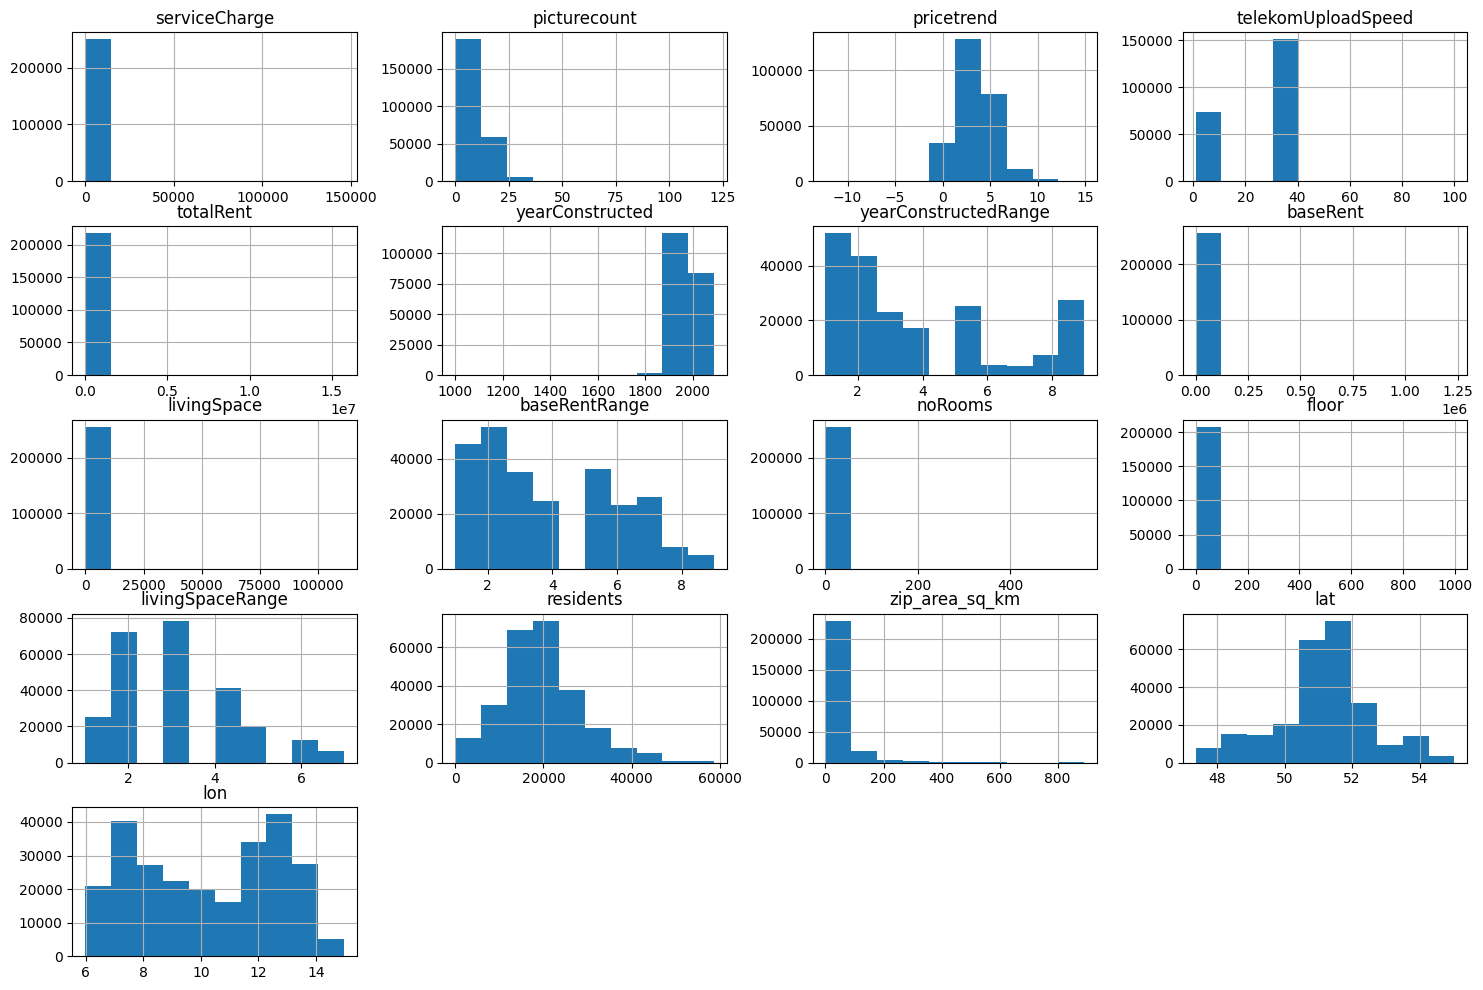

In [61]:
(
    data
    .select_dtypes(include=['number'])
    .hist(figsize=(18, 12))
);

#### serviceCharge

<Axes: >

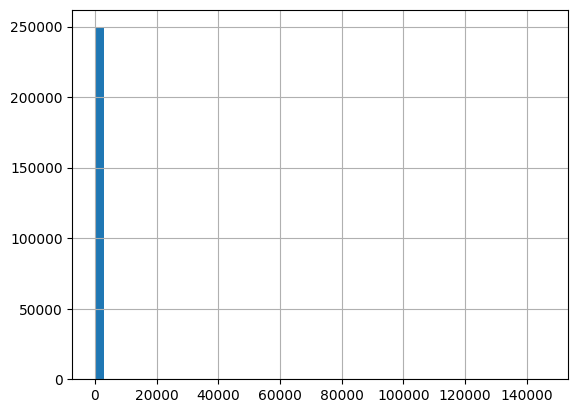

In [62]:
(
    data
    .serviceCharge
    .hist(bins =50)
)

In [63]:
# Fill NA values with mean values
data['serviceCharge'].fillna(data['serviceCharge'].median(), inplace=True);
(
    data
    .serviceCharge
    .isna()
    .sum()
)

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_3587/3317035676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['serviceCharge'].fillna(data['serviceCharge'].median(), inplace=True);


np.int64(0)

#### yearConstructed

In [64]:
(
    data
    .yearConstructed
    .value_counts()
    .nunique()
)

173

In [65]:
# percentage of null values
(
    data
    .yearConstructed
    .isna()
    .sum()/len(data)*100
).round(3)

np.float64(20.697)

In [66]:
(
    data
    .yearConstructed
    .describe()
)

count    202827.000000
mean       1966.418100
std          47.099747
min        1000.000000
25%        1950.000000
50%        1973.000000
75%        1996.000000
max        2090.000000
Name: yearConstructed, dtype: float64

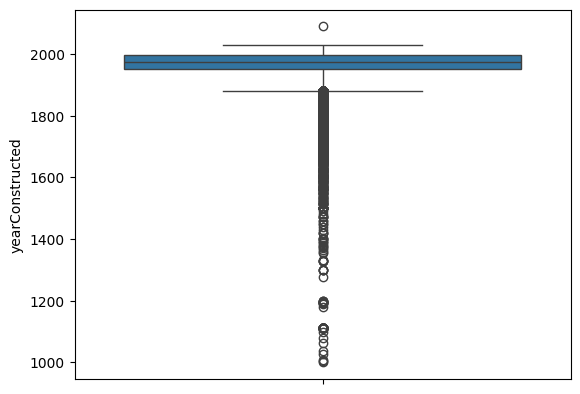

In [67]:
sns.boxplot(data['yearConstructed']);

In [68]:
def percent_of_outliers(data, column):
    # Calculate Q1 and Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR 
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data)) * 100
    
    return outlier_percentage


def remove_outliers(data, column):
    # Calculate Q1 and Q3 
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR 
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # remove outliers 
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

In [69]:
outlier_percentage = percent_of_outliers(data, 'yearConstructed')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

data = remove_outliers(data, 'yearConstructed')

(
    data
    .yearConstructed
    .describe()
)

Percentage of outliers: 1.19%


count    199781.000000
mean       1969.102888
std          37.172525
min        1881.000000
25%        1952.000000
50%        1973.000000
75%        1997.000000
max        2029.000000
Name: yearConstructed, dtype: float64

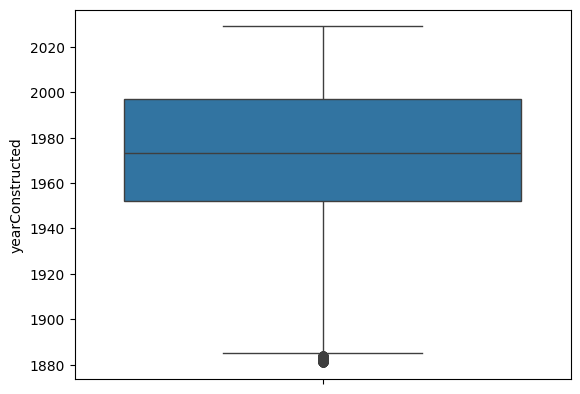

In [70]:
sns.boxplot(data['yearConstructed']);

In [71]:
print(f"median yearConstructed: {np.median(data['yearConstructed'])}")

(
    data
    .yearConstructed
    .isna()
    .sum()
)

median yearConstructed: 1973.0


np.int64(0)

In [72]:
# categoriging the years
bin_edges = [1881, 1952, 1973, 1997, 2030]

# defining the categories names
category_names = ['1881-1952', '1952-1973', '1973-1997', '1997-2030']

# categorize years constructed

data['yearConstructed_category'] = pd.cut(data['yearConstructed'], 
                               bins=bin_edges, 
                               labels=category_names, 
                               right=False) 
# change column type into string
data['yearConstructed_category'] = data['yearConstructed_category'].astype(object)

# droping the old column
data =  data.drop(columns='yearConstructed', axis=1)

# checking the new column
(
    data
    .yearConstructed_category
    .value_counts(normalize=True) * 100
)



yearConstructed_category
1973-1997    25.708150
1997-2030    25.093978
1881-1952    24.929798
1952-1973    24.268074
Name: proportion, dtype: float64

In [73]:
(
    data
    .yearConstructed_category
    .isna()
    .sum()
)

np.int64(0)

#### yearConstructedRange

In [74]:
(
    data
    .yearConstructedRange
    .nunique()
)

9

In [75]:
(
    data
    .yearConstructedRange
    .describe()
)

count    199781.000000
mean          3.759652
std           2.739912
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: yearConstructedRange, dtype: float64

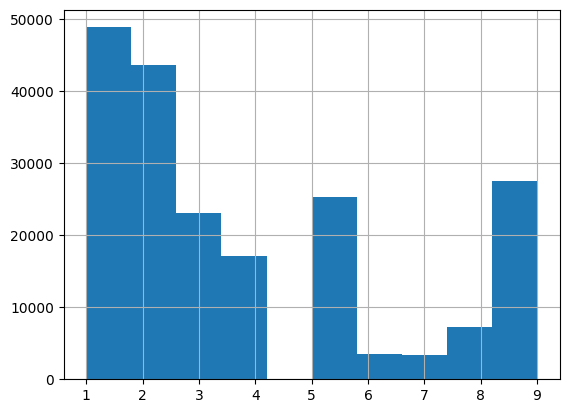

In [76]:
(
    data
    .yearConstructedRange
    .hist()
);

In [77]:
# fillna with median values
data.yearConstructedRange = data.yearConstructedRange.fillna(np.median(data.yearConstructedRange))

# changing data type 
data.yearConstructedRange = data.yearConstructedRange.astype(object)


#### floor 

In [78]:
(
    data
    .floor
    .isna()
    .sum()/ len(data) * 100
)

np.float64(16.92253017053674)

In [79]:
(
    data
    .floor
    .describe()
)

count    165973.000000
mean          2.146614
std           2.639758
min          -1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         650.000000
Name: floor, dtype: float64

<Axes: ylabel='floor'>

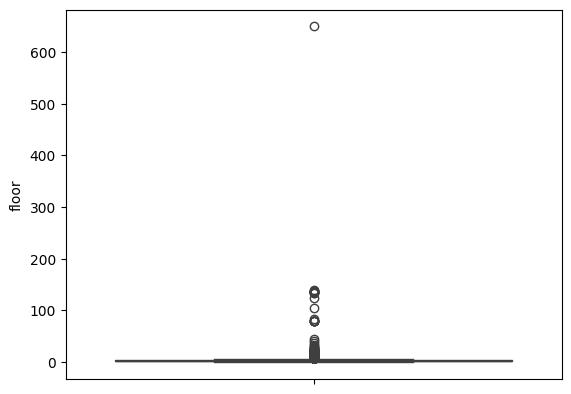

In [80]:
sns.boxplot(data.floor)

In [81]:
# percent of outiers 
outlier_percentage = percent_of_outliers(data, 'floor')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 1.39%


In [82]:
# fillna values with median values
data['floor'] = data['floor'].fillna(data['floor'].median())

In [83]:
# Define floor thresholds and category labels
floor_thresholds = [-float('inf'), 0, 3.0, 5.0, 45.0, float('inf')]
floor_labels = ['ground_floor_and_below', 'floor_0_3', 'floor_4_5', 'floor_6_45', 'floor_above_45']

# Categorize the 'floor' column using defined bins and labels
data['floor_category'] = pd.cut(
    data['floor'], 
    bins=floor_thresholds, 
    labels=floor_labels
)

# Display category counts
category_counts = data['floor_category'].value_counts()
print(category_counts)


floor_category
floor_0_3                 153280
floor_4_5                  22058
ground_floor_and_below     19526
floor_6_45                  4897
floor_above_45                20
Name: count, dtype: int64


In [84]:
#change datatype 
data['floor_category'] = data['floor_category'].astype(object)

# drop old column
data =  data.drop(columns='floor', axis=1)

#### totalRent

In [85]:
(
    data
    .totalRent
    .isna()
    .sum()/ len(data) * 100
)

np.float64(15.42188696622802)

In [86]:
(
    data
    .totalRent
    .describe()
)

count    1.689710e+05
mean     9.256783e+02
std      3.834133e+04
min      0.000000e+00
25%      4.702300e+02
50%      6.550000e+02
75%      1.000000e+03
max      1.575154e+07
Name: totalRent, dtype: float64

<Axes: ylabel='totalRent'>

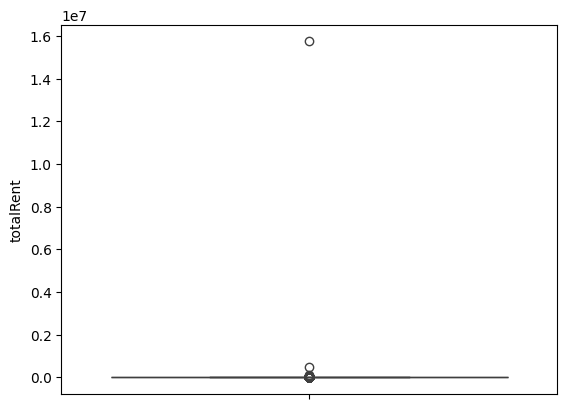

In [87]:
sns.boxplot(data.totalRent)

In [88]:
# Percentage of outliers
outlier_percentage = percent_of_outliers(data, 'totalRent')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 4.57%


<Axes: ylabel='totalRent'>

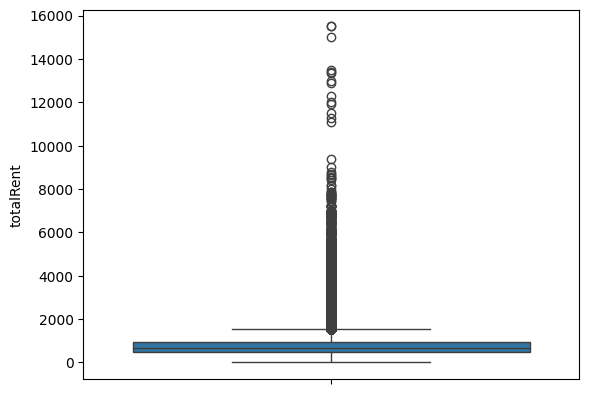

In [89]:
# Remove the top 10 maximum values from 'totalRent' column
top_10_max_values = data['totalRent'].nlargest(10)
data = data[~data['totalRent'].isin(top_10_max_values)]

# fillna values with median values
data['totalRent'] = data['totalRent'].fillna(data['totalRent'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['totalRent'])



#### pricetrend

In [90]:
(
    data
    .pricetrend
    .isna()
    .sum()/len(data)*100
)

np.float64(0.72433298293037)

<Axes: xlabel='pricetrend'>

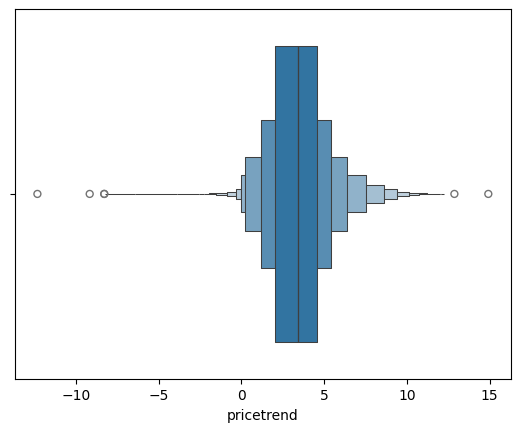

In [91]:
sns.boxenplot(x = data['pricetrend'])

In [92]:
# perecent of outliers
outlier_percentage = percent_of_outliers(data, 'pricetrend')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 2.01%


In [93]:
# mean and median values
mean_price_trend = data['pricetrend'].mean()
median_price_trend = data['pricetrend'].median()

print(f"median_price_trend = {median_price_trend}")
print(f"mean_price_trend = {mean_price_trend}")

median_price_trend = 3.39
mean_price_trend = 3.4192139590466053


In [94]:
# fillna values with median values
data['pricetrend'] = data['pricetrend'].fillna(median_price_trend)

#### pictureCount

In [95]:
(
    data
    .picturecount
    .isna()
    .sum()/len(data) * 100
)

np.float64(0.0)

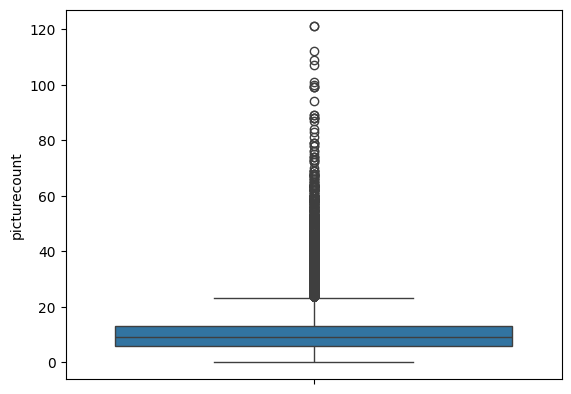

In [96]:
sns.boxplot(data['picturecount']);

#### baseRent

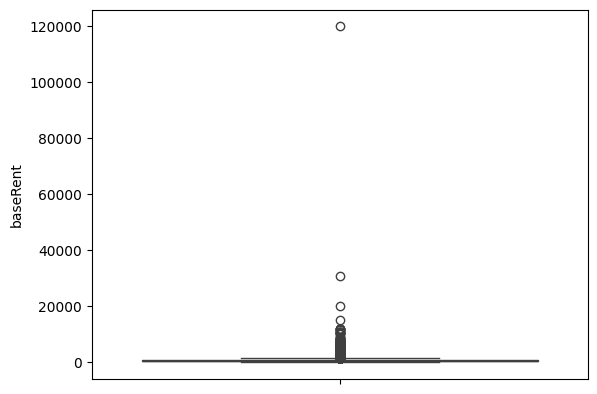

In [97]:
sns.boxplot(data['baseRent']);

In [98]:
# percent of outliers
outlier_percentage = percent_of_outliers(data, 'baseRent')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 5.29%


<Axes: ylabel='baseRent'>

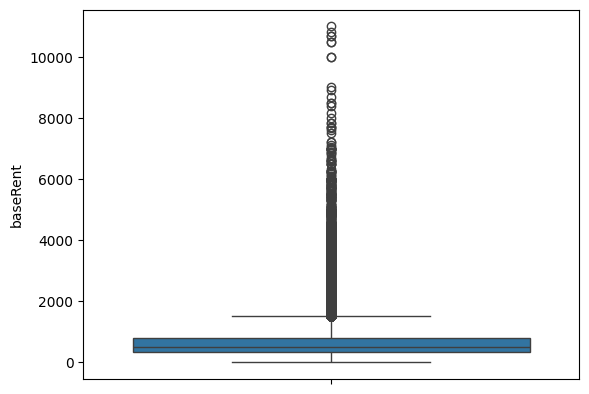

In [99]:
# fillna values with median values
data['baseRent'] = data['baseRent'].fillna(np.median(data['totalRent']))

# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['baseRent'].nlargest(10)
data = data[~data['baseRent'].isin(top_10_max_values)]

# Create the boxplot for the cleaned data
sns.boxplot(data['baseRent'])

#### livingSpace

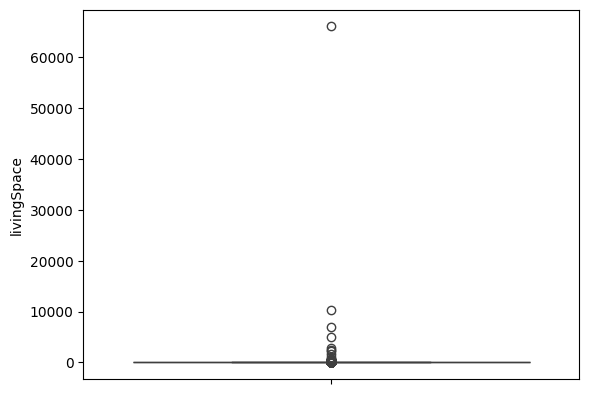

In [100]:
sns.boxplot(data['livingSpace']);

<Axes: ylabel='livingSpace'>

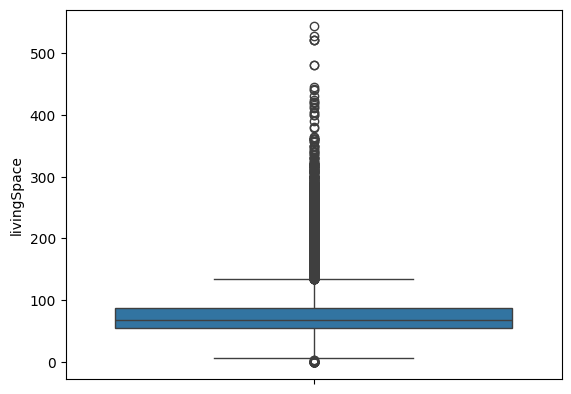

In [101]:
# fillna values with median values
data['livingSpace'] = data['livingSpace'].fillna(np.median(data['livingSpace']))

# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['livingSpace'].nlargest(10)
data = data[~data['livingSpace'].isin(top_10_max_values)]

# Create the boxplot for the cleaned data
sns.boxplot(data['livingSpace'])

#### baseRentRange

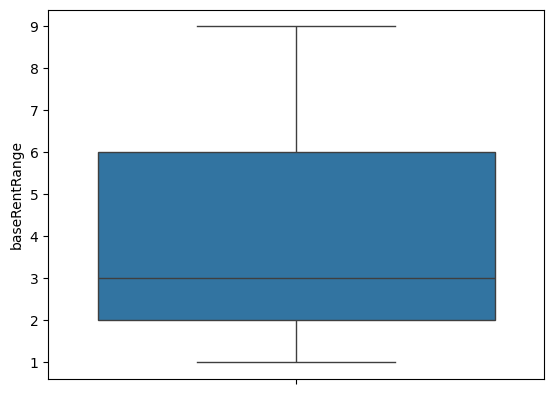

In [102]:
sns.boxplot(data['baseRentRange']);

#### telekomUploadSpeed

In [103]:
(
    data
    .telekomUploadSpeed
    .isna()
    .sum()/len(data) * 100
)

np.float64(12.536670838548186)

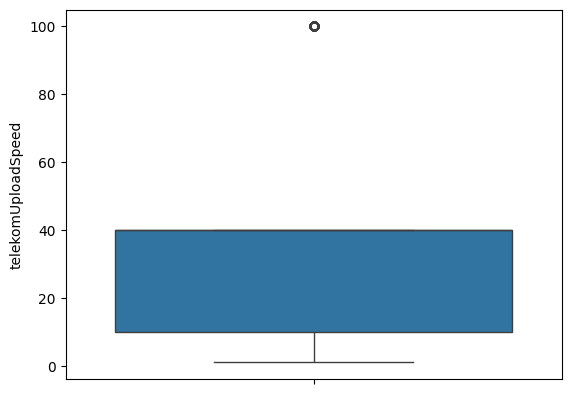

In [104]:
sns.boxplot(data['telekomUploadSpeed']);

<Axes: ylabel='telekomUploadSpeed'>

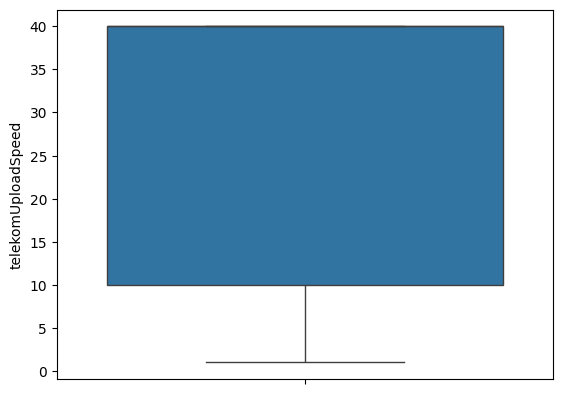

In [105]:
# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['telekomUploadSpeed'].nlargest(1)
data = data[~data['telekomUploadSpeed'].isin(top_10_max_values)]


# fillna values with median values
data['telekomUploadSpeed'] = data['telekomUploadSpeed'].fillna(data['telekomUploadSpeed'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['telekomUploadSpeed'])

#### geo_plz

In [106]:
(
    data
    .geo_plz
    .head(10)
)

0     44269
2     01097
3     09599
4     28213
5     24891
7     28717
8     79211
9     45888
10    09130
11    09669
Name: geo_plz, dtype: object

In [107]:
four_digit_values = data[data['geo_plz'].astype(str).str.len() == 4]
print(len(four_digit_values)/len(data))

0.0


In [108]:
# Adding a leading zero
data['geo_plz'] = data['geo_plz'].astype(str).str.zfill(5)

# Verify transformation
print(data['geo_plz'].head())

0    44269
2    01097
3    09599
4    28213
5    24891
Name: geo_plz, dtype: object


In [109]:
# changing the datatype
data['geo_plz'] = data['geo_plz'].astype('object')

#### noRooms

<Axes: ylabel='noRooms'>

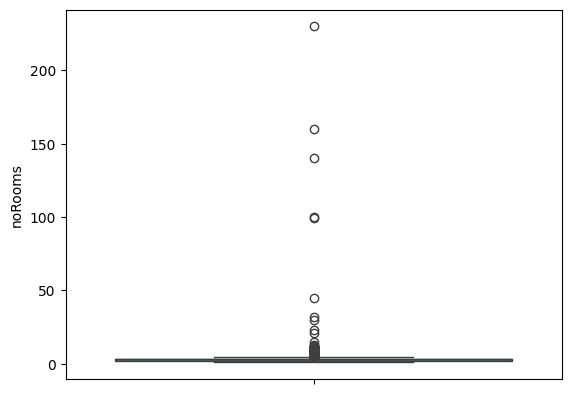

In [110]:
sns.boxplot(data['noRooms'])

<Axes: ylabel='noRooms'>

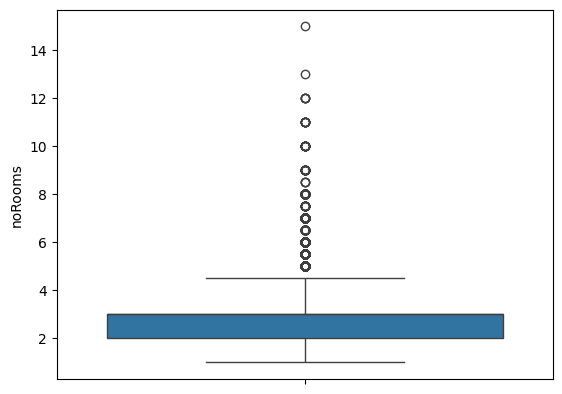

In [111]:
# Remove the top 10 maximum values from 'baseRent' column
top_10_max_values = data['noRooms'].nlargest(10)
data = data[~data['noRooms'].isin(top_10_max_values)]


# fillna values with median values
data['noRooms'] = data['noRooms'].fillna(data['noRooms'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['noRooms'])

In [112]:
# changing datatype
data['noRooms'] = data['noRooms'].astype('int').astype('object')

#### livingSpaceRange

<Axes: ylabel='livingSpaceRange'>

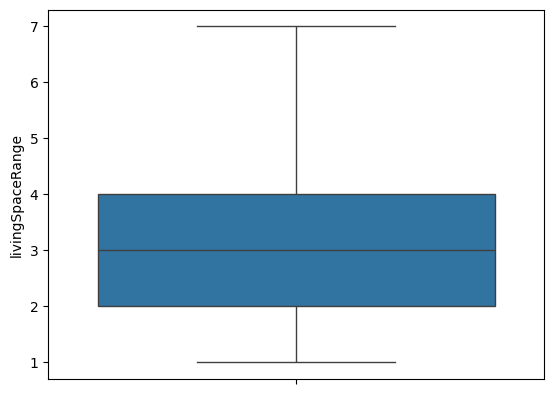

In [113]:
sns.boxplot(data['livingSpaceRange'])

In [114]:
data['livingSpaceRange'] = data['livingSpaceRange'].astype('int').astype('object')

#### livingSpace

<Axes: ylabel='livingSpace'>

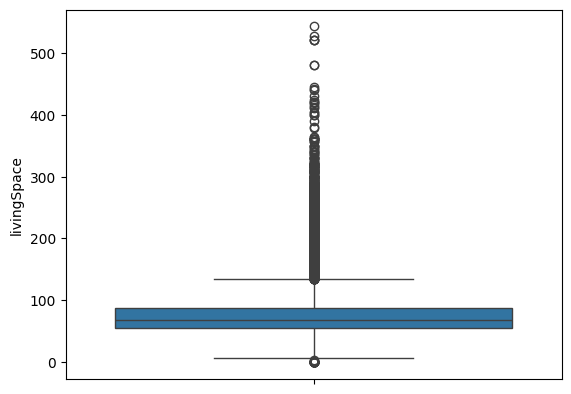

In [115]:
sns.boxplot(data['livingSpace'])

In [116]:
# percentage of outliers
outlier_percentage = percent_of_outliers(data, 'livingSpace')
print(f"Percentage of outliers: {outlier_percentage:.2f}%")

Percentage of outliers: 4.30%


In [117]:
(
    data
    .livingSpace
    .describe()
)

count    199627.000000
mean         73.732287
std          31.397250
min           0.000000
25%          55.000000
50%          67.700000
75%          87.000000
max         542.530000
Name: livingSpace, dtype: float64

In [118]:
# living space can not be less than 1
data = data[data['livingSpace'] >= 1]

<Axes: ylabel='livingSpace'>

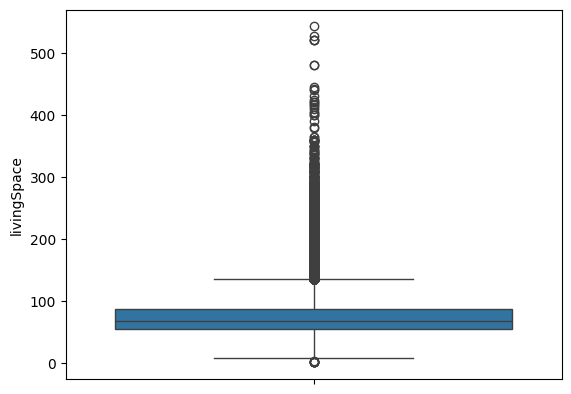

In [119]:
# fillna values with median values
data['livingSpace'] = data['livingSpace'].fillna(data['livingSpace'].median())

# Create the boxplot for the cleaned data
sns.boxplot(data['livingSpace'])

In [120]:
data.shape

(199588, 37)

In [1]:
# checking NA values
data.isna().sum()

NameError: name 'data' is not defined

In [122]:
data.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,livingSpaceRange,residents,zip_area_sq_km,lat,lon,stateName,heatingType,telekomTvOffer,newlyConst,balcony,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,lift,typeOfFlat,geo_plz,garden,cityName,cityDistrict,date,geo_plz_2,cityName_mapped,yearConstructed_category,floor_category
0,245.00,6,4.62,10.0,840.0,2.0,595.0,86.00,4,4,4,21539,7.401962,51.48921,7.53263,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,oil,False,True,well_kept,normal,unknown,False,ground_floor,44269,True,Dortmund,Schüren,May19,44,Dortmund,1952-1973,floor_0_3
2,255.00,8,2.72,2.4,1300.0,9.0,965.0,83.80,6,3,4,14821,3.298022,51.06945,13.73781,Sachsen,floor_heating,ONE_YEAR_FREE,True,True,gas,False,True,first_time_use,sophisticated,unknown,True,apartment,01097,False,Dresden,Äußere_Neustadt_Antonstadt,Oct19,01,Dresden,1997-2030,floor_0_3
3,58.15,9,1.53,40.0,655.0,2.0,343.0,58.15,2,3,2,39861,48.291826,50.91720,13.33940,Sachsen,district_heating,ONE_YEAR_FREE,False,True,district_heating,False,False,unknown,unknown,unknown,False,other,09599,False,Mittelsachsen_Kreis,Freiberg,May19,09,Chemnitz,1952-1973,floor_0_3
4,138.00,19,2.46,40.0,903.0,1.0,765.0,84.97,5,3,4,12077,4.044656,53.09800,8.83931,Bremen,self_contained_central_heating,unknown,False,True,gas,False,False,refurbished,unknown,unknown,False,apartment,28213,False,Bremen,Neu_Schwachhausen,Feb20,28,Bremen,1881-1952,floor_0_3
5,142.00,5,4.48,2.4,655.0,5.0,315.2,53.43,2,2,2,1302,24.861634,54.63964,9.64105,Schleswig_Holstein,gas_heating,unknown,False,True,gas,True,False,well_kept,unknown,no,False,apartment,24891,False,Schleswig_Flensburg_Kreis,Struxdorf,Feb20,24,Kiel,1997-2030,floor_0_3


In [123]:
# removing unecessary columns not needed for analysis
data = data.drop(['baseRentRange','livingSpaceRange','cityName','cityDistrict','yearConstructedRange','lat','lon'], axis=1)
data = data.rename(columns={'geo_plz_2': 'cityCode', 'cityName_mapped': 'cityName'})
data['cityCode'] = data['cityCode'].astype('string')
data.columns


Index(['serviceCharge', 'picturecount', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'baseRent', 'livingSpace', 'noRooms', 'residents',
       'zip_area_sq_km', 'stateName', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'firingTypes', 'hasKitchen', 'cellar',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'typeOfFlat',
       'geo_plz', 'garden', 'date', 'cityCode', 'cityName',
       'yearConstructed_category', 'floor_category'],
      dtype='object')

## 5 Export cleaned data

In [124]:
def export_dataframe(dataframe, file_name):
    # defining base dir
    base_dir = os.getcwd()
    
    # Construct the path to the Data directory
    data_dir = os.path.join(base_dir, '..', 'Data')

    # Ensure the directory exists
    os.makedirs(data_dir, exist_ok=True)
    
    # Create the full file path
    file_path = os.path.join(data_dir, file_name)
    
    # Export the dataframe to CSV
    dataframe.to_csv(file_path, index=False)
    
    print(f"DataFrame exported to: {file_path}")


In [125]:
export_dataframe(data, 'cleaned_data.csv')

DataFrame exported to: /Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Sem2/data_visualisation/Joon_project/Notebooks/../Data/cleaned_data.csv
